# Bharath Gunasekaran
# CMPE 258

Mnist with numpy mlp

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import sys, numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

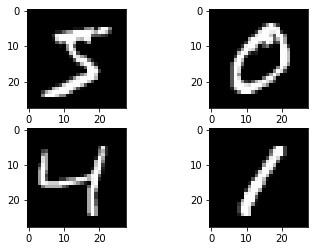

(28, 28)


In [3]:
# Looking at how the data looks
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
print(x_train[0].shape)

In [4]:
# Reshaping data for image augmentation
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
x_train.shape

(60000, 28, 28, 1)

In [6]:
datagen =  ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)


In [7]:
# Normalizing Images
x_train = x_train/255
x_test = x_test/255

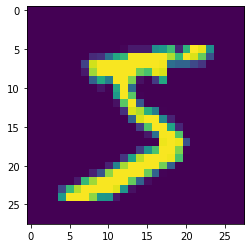

In [8]:
plt.imshow(x_train[0][:,:,0])

In [9]:
# Activation Functions 
def relu(x):
    return (x >= 0) * x

def relu2deriv(output):
    return output >= 0

def tanh(x):
    return np.tanh(x)

def tanhDeriv(output):
    return 1 - (output ** 2)

In [10]:
import sys, numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

# Reshaping training data and one hot label for y_train
# image size
pixel_width = 28
images, labels = x_train.reshape(len(x_train),pixel_width**2), y_train

train_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    train_labels[i][l] = 1
labels = train_labels

test_images = x_test.reshape(len(x_test),pixel_width**2)
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

In [11]:

def create_weights(layers):
    weights1 = 0.01 * np.random.randn(layers[0],layers[1])
    weights2 = 0.01 * np.random.randn(layers[1],layers[2])
    weights3 = 0.01 * np.random.randn(layers[2],layers[3])
    return (weights1, weights2, weights3)

In [12]:
import numpy as np
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(2)

# Intializing weights and parameters for Neural Network
batch_size = 100
alpha, iterations = (0.02, 20                                                      )
pixels_per_image, hidden_size1, hidden_size2, num_labels = (pixel_width**2, 300,250, 10)

weights1, weights2, weights3 = create_weights([pixel_width**2, 300,250, 10])


y_pred = []
y_true = []
test_accuracy = []
train_accuracy = []
test_err = []
train_err = []
for j in range(iterations):
    error, train_correct_pred = (0.0, 0)
    # Training with mini batch
    for i in range(int(len(images) / batch_size)):
        # Creating our batch
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        """
        Forward Propagation with 3 layers. 
        Using a relu and tanh activation layer.
        Also using 2 different dropout rate for layer 1 and layer 2. 
        """
        input_layer = images[batch_start:batch_end]
        layer1 = relu(np.dot(input_layer,weights1))
        dropout_mask = np.random.randint(2,size=layer1.shape)
        layer1 *= dropout_mask * 2
        layer2 = tanh(np.dot(layer1,weights2))
        dropout_mask2 = np.random.randint(2,size=layer2.shape)
        layer2 *= dropout_mask2 * 1.5

        layer3 = np.dot(layer2,weights3)

        # Calculating Error
        error += np.sum((labels[batch_start:batch_end] - layer3) ** 2)
        for k in range(batch_size):
            train_correct_pred += int(np.argmax(layer3[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

        # Backpropagation 
        layer_3_delta = (labels[batch_start:batch_end]-layer3)/batch_size
        layer_2_delta = layer_3_delta.dot(weights3.T)* tanhDeriv(layer2)
        layer_2_delta *= dropout_mask2
        layer_1_delta = layer_2_delta.dot(weights2.T)* relu2deriv(layer1)
        layer_1_delta *= dropout_mask

        # Updating the weights
        weights3 += alpha * layer2.T.dot(layer_3_delta)
        weights2 += alpha * layer1.T.dot(layer_2_delta)
        weights1 += alpha * input_layer.T.dot(layer_1_delta)
            
    test_error = 0.0
    test_correct_pred = 0
    y_pred = []
    y_true = []
    # Validating our model at every iteration
    for i in range(len(test_images)):
        layer0 = test_images[i:i+1]
        layer1 = relu(np.dot(layer0,weights1))
        layer2 = tanh(np.dot(layer1, weights2))
        layer3 = np.dot(layer2,weights3)


        test_error += np.sum((test_labels[i:i+1] - layer3) ** 2)
        y_pred += [int(np.argmax(layer3))]
        y_true += [np.argmax(test_labels[i:i+1])]
        test_correct_pred += int(np.argmax(layer3) == np.argmax(test_labels[i:i+1]))

    tterr = round(test_error/ float(len(test_images)),3)
    ttacc = round(test_correct_pred/ float(len(test_images)),3)
    tnerr = round(error/ float(len(images)),3)
    tnacc = round(train_correct_pred/ float(len(images)),3)
    test_accuracy.append(ttacc)
    train_accuracy.append(tnacc)
    test_err.append(tterr)
    train_err.append(tnerr)

    # Printing out Training and Test error and accuracy 
    print("Iteraction: {} Test Error: {} Test Accuracy: {} Train Error: {} Train Accuracy {}".format(j,tterr,ttacc,tnerr,tnacc))

Iteraction: 0 Test Error: 0.898 Test Accuracy: 0.224 Train Error: 0.941 Train Accuracy 0.171
Iteraction: 1 Test Error: 0.828 Test Accuracy: 0.569 Train Error: 0.876 Train Accuracy 0.328
Iteraction: 2 Test Error: 0.705 Test Accuracy: 0.579 Train Error: 0.785 Train Accuracy 0.483
Iteraction: 3 Test Error: 0.631 Test Accuracy: 0.619 Train Error: 0.694 Train Accuracy 0.561
Iteraction: 4 Test Error: 0.564 Test Accuracy: 0.671 Train Error: 0.63 Train Accuracy 0.618
Iteraction: 5 Test Error: 0.504 Test Accuracy: 0.73 Train Error: 0.575 Train Accuracy 0.676
Iteraction: 6 Test Error: 0.457 Test Accuracy: 0.749 Train Error: 0.528 Train Accuracy 0.718
Iteraction: 7 Test Error: 0.43 Test Accuracy: 0.754 Train Error: 0.496 Train Accuracy 0.731
Iteraction: 8 Test Error: 0.419 Test Accuracy: 0.757 Train Error: 0.476 Train Accuracy 0.736
Iteraction: 9 Test Error: 0.41 Test Accuracy: 0.766 Train Error: 0.465 Train Accuracy 0.743
Iteraction: 10 Test Error: 0.403 Test Accuracy: 0.793 Train Error: 0.456 T

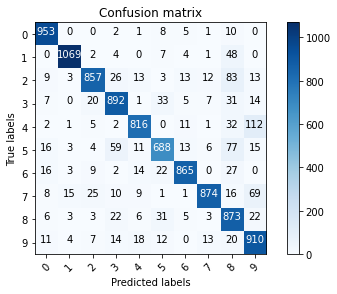

In [18]:
# Confusion matrix 
# Code referenced from https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')

confusion_mtx = confusion_matrix(y_true, y_pred) 
plot_confusion_matrix(confusion_mtx, classes = range(10))

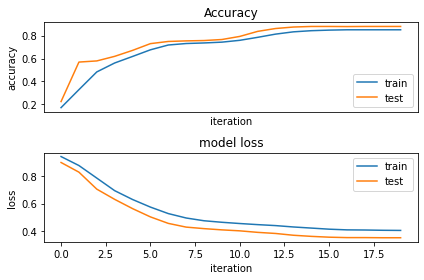

In [19]:
# plotting the metrics
plt.subplot(2,1,1)
plt.plot(train_accuracy)
plt.plot(test_accuracy)
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('iteration')
plt.xticks([])
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(train_err)
plt.plot(test_err)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [15]:
# Finding all images that model failed to predict
y_pred = np.array(y_pred)
y_true = np.array(y_true)
errors = (y_pred - y_true != 0)

y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_val_errors = x_test[errors]


In [16]:
def display_errors(img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    index = 0
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            ax[row,col].imshow((img_errors[index]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[index],obs_errors[index]))
            n += 1
            index+=1

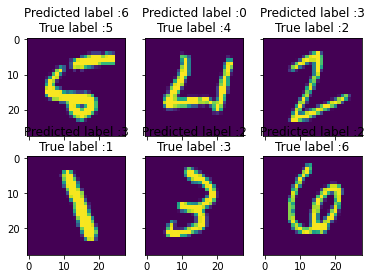

In [17]:
display_errors(x_val_errors,y_pred_errors,y_true_errors)